# Exercise 1

We first load a dataset and examine its dimensions.

In [20]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

Text(0.5, 1.0, 'Data Scatterplot')

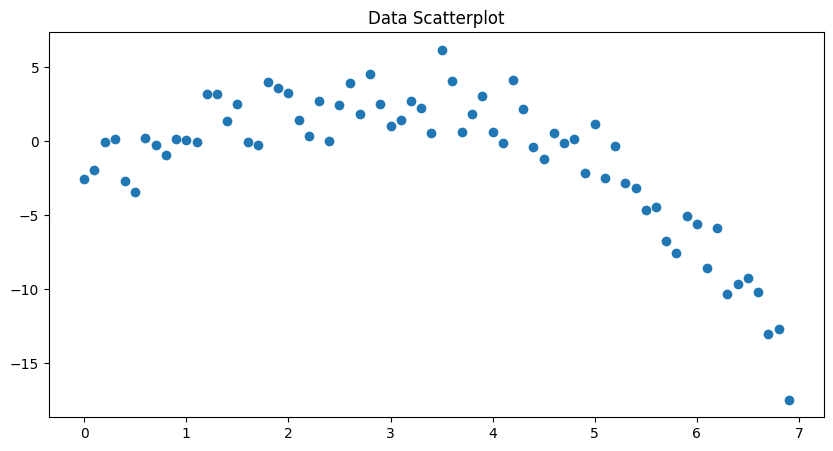

In [22]:
import matplotlib.pyplot as plt
plt.scatter(xy_data[:,0], xy_data[:,1], label='Data')
plt.title("Data Scatterplot")



### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [23]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals

    Y = data_matrix[:,1]
    X = np.ones(len(data_matrix[:,0]))
    betas = 0
    
    if (k != 0):
        for i in range(1, k+1):
            X = np.column_stack((X, data_matrix[:,0] ** i))
        betas = np.linalg.lstsq(X, Y, rcond=None)[0]
    else:
        betas = X.dot(Y) / len(X)
    
    fit = X.dot(betas)
    residuals = Y - fit

    return [betas, fit, residuals]

Use the tests below to check the outputs of the function you have written:

In [24]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

k = 2:
     SSE = 172.18102528988547.
     R**2 = 0.8876297774918224.
k = 3:
     SSE = 152.40580488915805.
     R**2 = 0.9005356474205022.
k = 4:
     SSE = 151.22778969027124.
     R**2 = 0.9013044535638857.


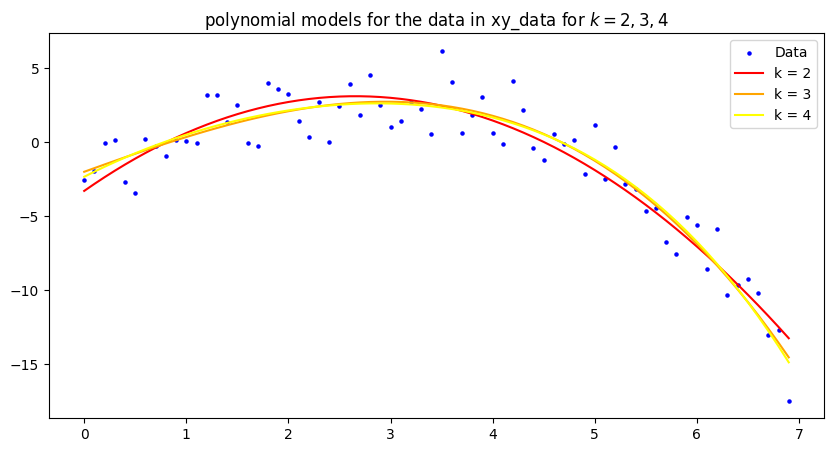

In [25]:
#Your code here
plt.scatter(xy_data[:,0], xy_data[:,1], label='Data', color="blue", s = 5)

SST = np.sum((xy_data[:,1] - np.mean(xy_data[:,1]))**2)

colors = ["red","orange","yellow"]
for i in range(2,5):
    poly_fit = polyreg(xy_data, i)
    plt.plot(xy_data[:,0], poly_fit[1], label=("k = " + str(i)), color=colors[i-2])
    
    SSE = np.linalg.norm(xy_data[:,1] - poly_fit[1])**2
    R_squared = 1 - SSE/SST

    print("k = " + str(i) + ":")
    print("     SSE = " + str(SSE) + ".")
    print("     R**2 = " + str(R_squared) + ".")

plt.title("polynomial models for the data in xy_data for $k=2,3,4$")
plt.legend()
plt.show()

 #### State which model you choose and briefly justify your choice.
 
 
 <The model with $k = 2$ would be my model of choice. This is because any other increase in the order only gives marginal improvements, and likely increases the $R^2$ due to overfitting. >
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

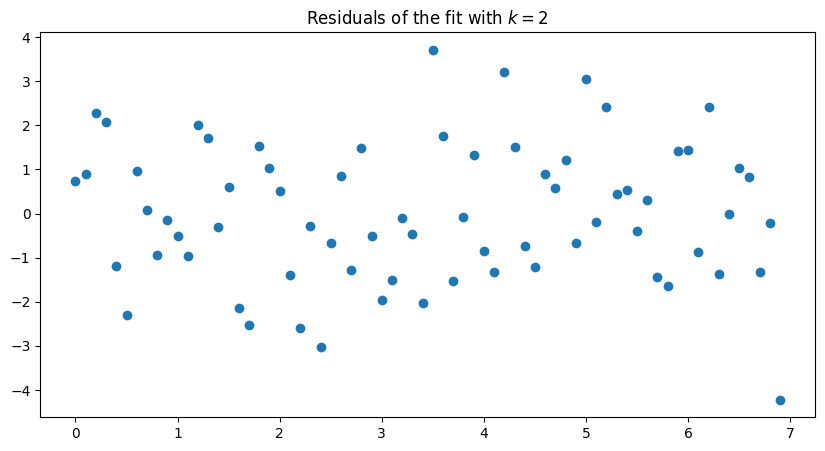

Mean of residuals =  -0.0 Variance of residuals =  2.46


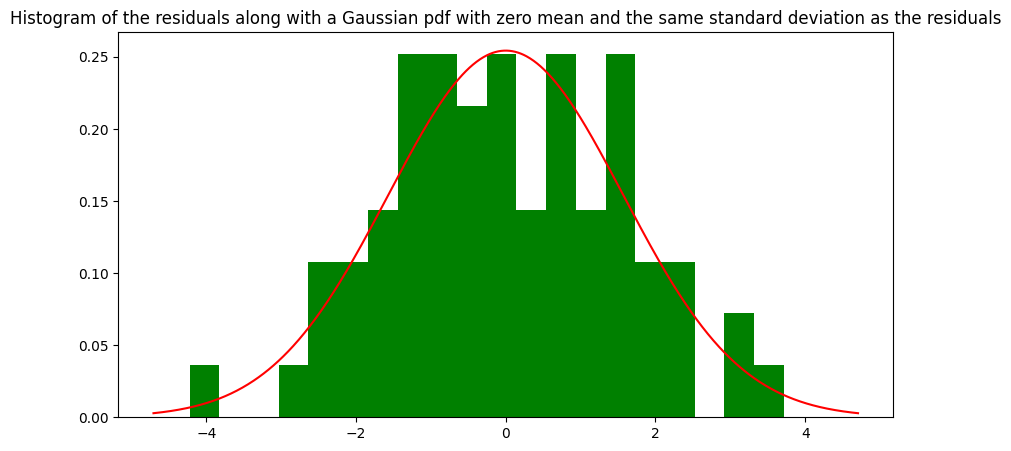

In [26]:
#Your code here
poly_fit = polyreg(xy_data, 2)

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(xy_data[:,0], poly_fit[2])
plt.title("Residuals of the fit with $k = 2$")
plt.show()

print('Mean of residuals = ', np.round(np.mean(poly_fit[2]), 5), 'Variance of residuals = ', 
      np.round(np.var(poly_fit[2]), 3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(poly_fit[2], bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(poly_fit[2])  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.title("Histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals")
plt.show()

In [27]:
print("successfully executed all cells")

successfully executed all cells
